In [52]:
!pip install numpy
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
import warnings

warnings.filterwarnings('ignore')

In [55]:
data = 'D:/Projects/Campus Project/Thiran - Sri-Lanka-Railway-System/web/storage/app/train.csv'

df = pd.read_csv(data)

In [56]:
df.head()

,Train_ID,Route_ID,From,To,Distance,Passenger_Load,Weather_Sunny,Weather_Cloudy,Weather_Rainy,Weather_Overcast,Duration
0,1,1,1,2,5,210,1,0,0,0,10
1,1,1,1,2,6,210,1,0,0,0,11
2,1,1,1,2,7,210,1,0,0,0,12
3,1,1,1,2,8,210,1,0,0,0,13
4,1,1,1,2,9,210,1,0,0,0,14


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Train_ID          60 non-null     int64
 1   Route_ID          60 non-null     int64
 2   From              60 non-null     int64
 3   To                60 non-null     int64
 4   Distance          60 non-null     int64
 5   Passenger_Load    60 non-null     int64
 6   Weather_Sunny     60 non-null     int64
 7   Weather_Cloudy    60 non-null     int64
 8   Weather_Rainy     60 non-null     int64
 9   Weather_Overcast  60 non-null     int64
 10  Duration          60 non-null     int64
dtypes: int64(11)
memory usage: 5.3 KB


In [58]:
df.corr()['Duration']

Train_ID                 NaN
Route_ID                 NaN
From                     NaN
To                       NaN
Distance            0.944866
Passenger_Load           NaN
Weather_Sunny            NaN
Weather_Cloudy           NaN
Weather_Rainy            NaN
Weather_Overcast         NaN
Duration            1.000000
Name: Duration, dtype: float64

In [59]:
df.shape

(60, 11)

In [60]:
df['Weather_Sunny'] = df['Weather_Sunny'].astype('uint8')
df['Weather_Cloudy'] = df['Weather_Sunny'].astype('uint8')
df['Weather_Rainy'] = df['Weather_Sunny'].astype('uint8')
df['Weather_Overcast'] = df['Weather_Sunny'].astype('uint8')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Train_ID          60 non-null     int64
 1   Route_ID          60 non-null     int64
 2   From              60 non-null     int64
 3   To                60 non-null     int64
 4   Distance          60 non-null     int64
 5   Passenger_Load    60 non-null     int64
 6   Weather_Sunny     60 non-null     uint8
 7   Weather_Cloudy    60 non-null     uint8
 8   Weather_Rainy     60 non-null     uint8
 9   Weather_Overcast  60 non-null     uint8
 10  Duration          60 non-null     int64
dtypes: int64(7), uint8(4)
memory usage: 3.6 KB


In [77]:
df.corr()['Duration']

Train_ID                 NaN
Route_ID                 NaN
From                     NaN
To                       NaN
Distance            0.944866
Passenger_Load           NaN
Weather_Sunny            NaN
Weather_Cloudy           NaN
Weather_Rainy            NaN
Weather_Overcast         NaN
Duration            1.000000
Name: Duration, dtype: float64

In [62]:
X = df.drop(['Duration'], axis=1)

y = df['Duration']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [64]:
X_train.shape, X_test.shape

((40, 10), (20, 10))

In [65]:
X_train.dtypes

Train_ID            int64
Route_ID            int64
From                int64
To                  int64
Distance            int64
Passenger_Load      int64
Weather_Sunny       uint8
Weather_Cloudy      uint8
Weather_Rainy       uint8
Weather_Overcast    uint8
dtype: object

In [66]:
X_train.head()

,Train_ID,Route_ID,From,To,Distance,Passenger_Load,Weather_Sunny,Weather_Cloudy,Weather_Rainy,Weather_Overcast
43,1,1,1,2,18,210,1,1,1,1
19,1,1,1,2,14,210,1,1,1,1
34,1,1,1,2,9,210,1,1,1,1
58,1,1,1,2,23,210,1,1,1,1
25,1,1,1,2,20,210,1,1,1,1


In [67]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.4500


In [68]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.4500


In [69]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [70]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Distance            1.0
Train_ID            0.0
Route_ID            0.0
From                0.0
To                  0.0
Passenger_Load      0.0
Weather_Sunny       0.0
Weather_Cloudy      0.0
Weather_Rainy       0.0
Weather_Overcast    0.0
dtype: float64

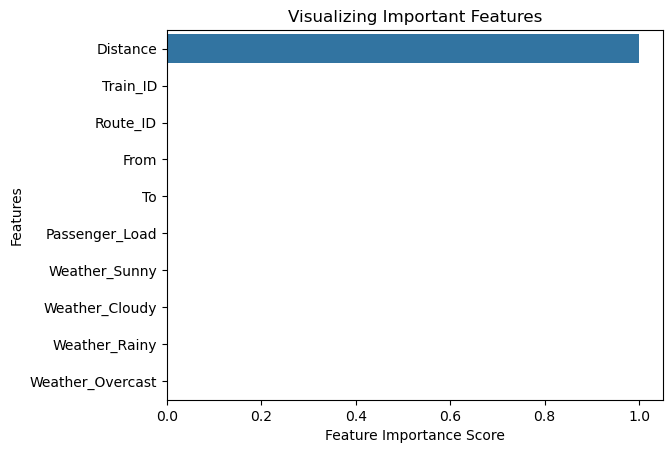

In [71]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [72]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         0
          18       0.50      1.00      0.67         1
          20       0.50      1.00      0.67         2
          21       0.33      1.00      0.50         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       0.50      1.00      0.67         1
          28       0.00      0.00      0.00         0
          29       0.00    